In [26]:
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['weatherAUS.csv']


In [27]:
#Import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection , svm
from sklearn.linear_model import LinearRegression

In [28]:
#Lets read the data
df = pd.read_csv('../input/weatherAUS.csv', index_col=0)

In [29]:
#Start exploring the data
df_1 = df.copy()
df_1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [30]:
#Seems that a number of data are categorical
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 2008-12-01 to 2017-06-24
Data columns (total 23 columns):
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-n

In [31]:
#And there are a good number of null value
df_1.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [32]:
#Lets handle the NA in a simple method by filling them as NA
df_1 = df_1.fillna(0)

In [33]:
#Seems that our label is in text format
df_1['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
#Lets transform them into numbers
TrueFalse = {'Yes': 1,'No': 0, 0:-99999} 
df_1['RainToday'] = [TrueFalse[item] for item in df_1['RainToday']]
df_1['RainTomorrow'] = [TrueFalse[item] for item in df_1['RainTomorrow']]

In [35]:
#The wind gust directions will need a similar treatment
#Create a list with all kinds of wind direction
dir_1 = list(df_1['WindGustDir'].unique())
dir_2 = list(df_1['WindDir9am'].unique())
dir_3 = list(df_1['WindDir3pm'].unique())
all_dir = dir_1 + dir_2 + dir_3
all_dir_dedup = list(set(all_dir))

#Create a dictionary with these wind direction to numbers for further mapping
dir_dict = {}
for num, winddir in enumerate(all_dir_dedup):
    dir_dict[winddir] = num

#Map these wind direction number
df_1['WindGustDir'] = df_1['WindGustDir'].map(dir_dict)
df_1['WindDir9am'] = df_1['WindDir9am'].map(dir_dict)
df_1['WindDir3pm'] = df_1['WindDir3pm'].map(dir_dict)

In [36]:
df_1.fillna(value = -99999, inplace=True)

In [37]:
#We would like to conduct some analysis on the variables
#lets drop the location and create a heat map
df_1_noloc = df_1.drop(columns = ['Location'])
df_1_noloc = df_1_noloc[df_1_noloc.columns].astype(float)

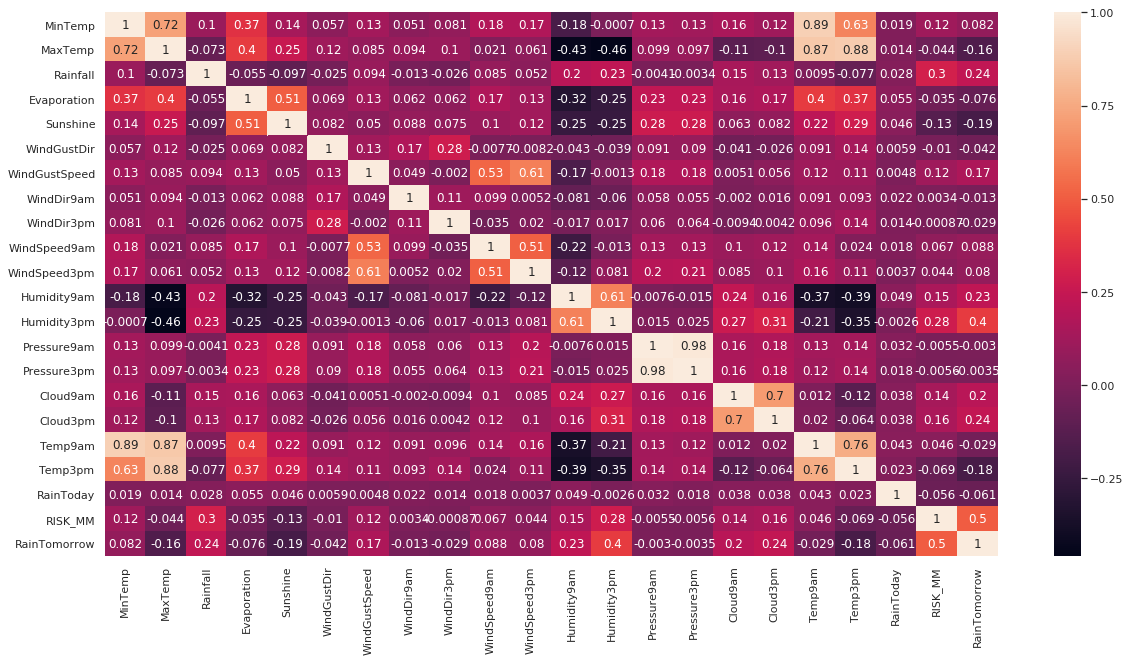

In [38]:
#Lets create a heatmap with seaborn
#Seems that humidity and 
dimension = (20,10)
fig, ax = plt.subplots(figsize = dimension)
sns.set(style='white')
sns.heatmap(df_1_noloc.reset_index(drop=True).corr(), annot=True)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


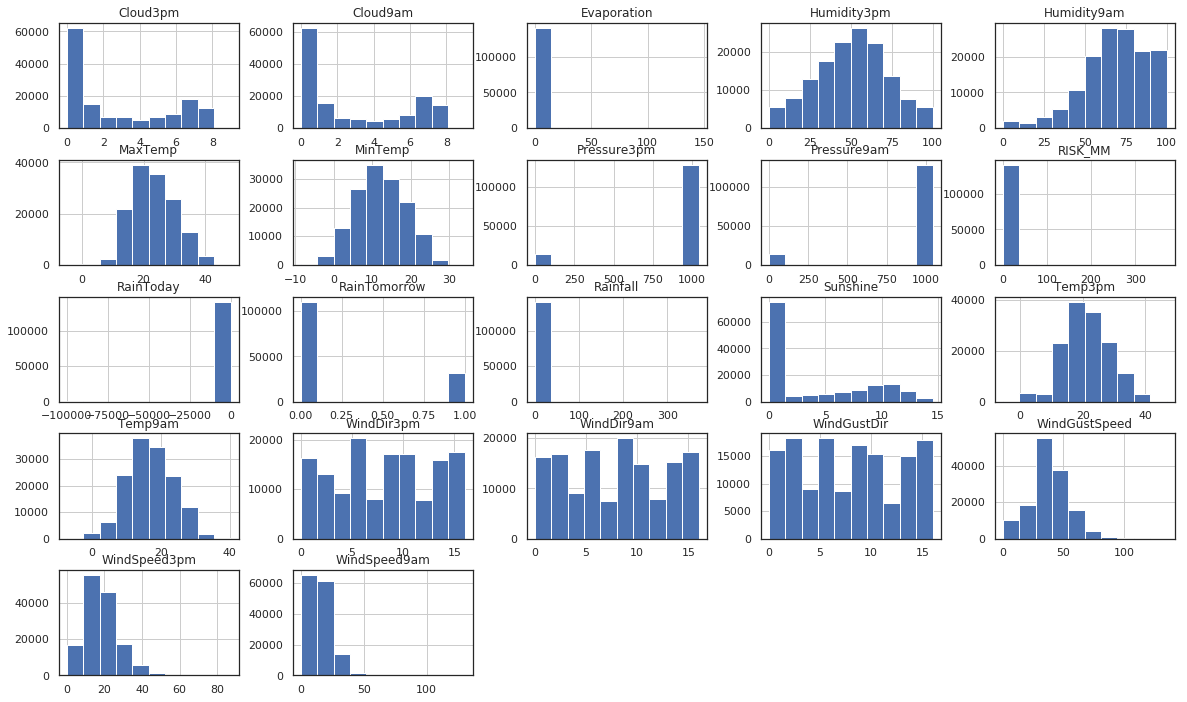

In [39]:
#Lets also look at the distribution of data with histogram
fig, ax= plt.subplots(figsize=(20,12))
hist = df_1_noloc.hist(ax = ax)


In [40]:
#Now we will create some very simple machine learning models
x = np.array(df_1_noloc.drop(['RainTomorrow'], 1))
y = np.array(df_1_noloc['RainTomorrow'])
x = preprocessing.scale(x)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)

In [41]:
#Linear Regression Model
clf=LinearRegression()
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print(confidence)

0.37401513499561445


In [42]:
#SVC
clf=svm.SVC()
clf.fit(x_train, y_train)
confidence = clf.score(x_test, y_test)
print(confidence)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9839305179507015


In [ ]:
#Here it seems that SVC is a better model than linear regression to predict the rainfall in Australia